In [12]:
import ants
import nibabel as nb


In [2]:
main_dir = '/Users/uriel/disks/meso_shared/'
project_dir = 'nCSF'
subject = 'sub-01'
anat_session = 'ses-01'

In [10]:
# Uniden 
uniden_fn= "{}/{}/sourcedata/{}/{}/anat/{}_{}_acq-UNIDEN_T1w.nii.gz".format(main_dir, project_dir, subject, anat_session, subject, anat_session)
uniden_img = nb.load(uniden_fn)
uniden_data = uniden_img.get_fdata()

# Inv2 
inv2_fn= "{}/{}/sourcedata/{}/{}/anat/{}_{}_acq-MP2RAGE_inv-2_part-mag_MP2RAGE.nii.gz".format(main_dir, project_dir, subject, anat_session, subject, anat_session)
inv2_img = nb.load(inv2_fn)
inv2_data = inv2_img.get_fdata()


In [15]:
# Normalise inv2 
min_val = np.min(inv2_data)
max_val = np.max(inv2_data)

inv2_data_norm = (inv2_data - min_val) / (max_val - min_val)

In [17]:
uni_mprageised_img = inv2_data_norm * uniden_data

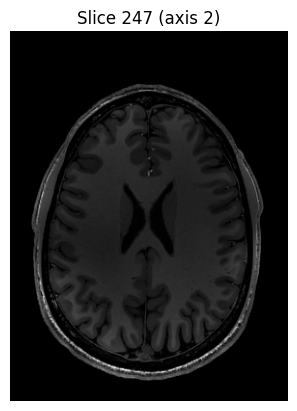

In [23]:
import numpy as np
import matplotlib.pyplot as plt


data_plot = uni_mprageised_img

# Choisir une dimension (ex: axiale = axe 2)
axis = 2  

# Nombre de coupes dans cette dimension
n_slices = data_plot.shape[axis]

# Tirer une coupe au hasard
rand_slice = np.random.randint(0, n_slices)

# Extraire la coupe
if axis == 0:
    slice_img = data_plot[rand_slice, :, :]
elif axis == 1:
    slice_img = data_plot[:, rand_slice, :]
else:
    slice_img = data_plot[:, :, rand_slice]

# Affichage
plt.imshow(np.rot90(slice_img), cmap='gray')
plt.title(f"Slice {rand_slice} (axis {axis})")
plt.axis('off')
plt.show()

In [14]:
ants.iMath(data_plot,"Normalize")

AttributeError: 'numpy.ndarray' object has no attribute 'dimension'